***1. Hourly Distribution of Twitter Likes***

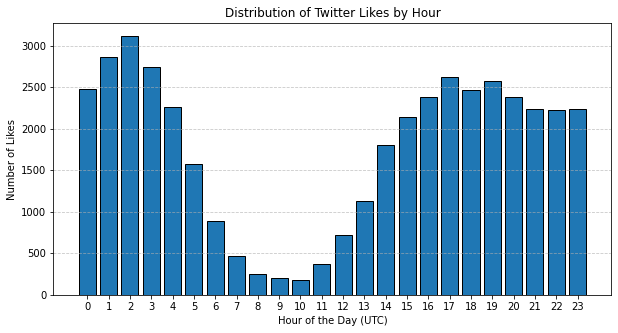

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("likes.csv", parse_dates=["timestamp"])

# Extract date and hour
df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour

# Group by hour to count likes
hourly_distribution = df.groupby("hour").size()

# Plot the hourly distribution
plt.figure(figsize=(10, 5))
plt.bar(hourly_distribution.index, hourly_distribution.values, width=0.8, edgecolor="black")
plt.xlabel("Hour of the Day (UTC)")
plt.ylabel("Number of Likes")
plt.title("Distribution of Twitter Likes by Hour")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


***2. Heatmap of Estimated Sleep Periods***

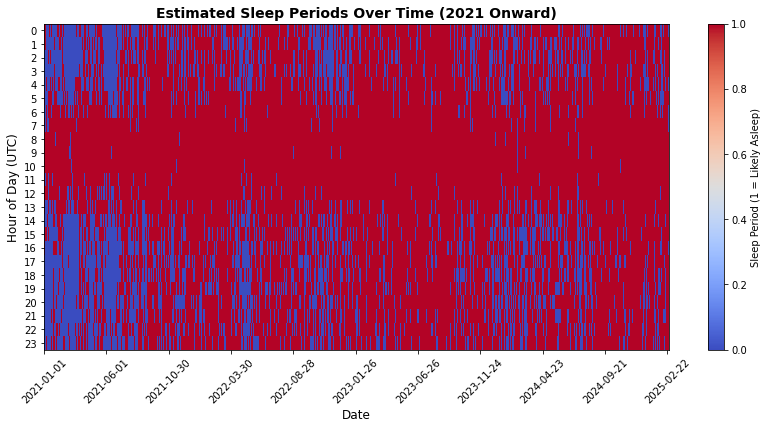

In [12]:
# Recreate daily_hourly_counts before applying filtering

# Group by date and hour to analyze inactivity periods
daily_hourly_counts = df.groupby(["date", "hour"]).size().unstack(fill_value=0)

# Convert index to datetime for filtering
daily_hourly_counts.index = pd.to_datetime(daily_hourly_counts.index)

# Filter data from 2021 onward
daily_hourly_counts_filtered = daily_hourly_counts.loc[daily_hourly_counts.index >= pd.to_datetime("2021-01-01")]

# Identify likely sleep periods (hours with few or no likes)
sleep_threshold = 1  # Assume hours with 1 or fewer likes are inactive
sleep_periods_filtered = (daily_hourly_counts_filtered <= sleep_threshold).astype(int)

# Set up the figure
plt.figure(figsize=(14, 6))
plt.imshow(sleep_periods_filtered.T, aspect="auto", cmap="coolwarm", interpolation="nearest")

# Formatting
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hour of Day (UTC)", fontsize=12)
plt.title("Estimated Sleep Periods Over Time (2021 Onward)", fontsize=14, fontweight="bold")

# Set date labels dynamically to avoid clutter
num_dates = len(daily_hourly_counts_filtered.index)
step = max(1, num_dates // 10)  # Show around 10 evenly spaced labels
plt.xticks(np.arange(0, num_dates, step), 
           [str(d.date()) for d in daily_hourly_counts_filtered.index[::step]], 
           rotation=45, fontsize=10)

plt.yticks(range(24), range(24), fontsize=10)
plt.colorbar(label="Sleep Period (1 = Likely Asleep)")

# Show refined heatmap
plt.show()
